# Red Wine Quality Prediction Project

### Dataset Description 

#### using machine learning we would find out which physiochemical properties makes wine quality good..

## Importing packages

In [160]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [102]:
df = pd.read_csv("winequality.csv")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
191,6.4,0.37,0.25,1.9,0.074,21.0,49.0,0.99740,3.57,0.62,9.8,6
826,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,7
1561,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7
565,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5


In [103]:
df.shape

(1599, 12)

In [104]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### as suggested in problem discription its a classification problem where we have to classified on two label i.e 7 or higher getting classified as 'good' and the rest as 'not good'..

In [106]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


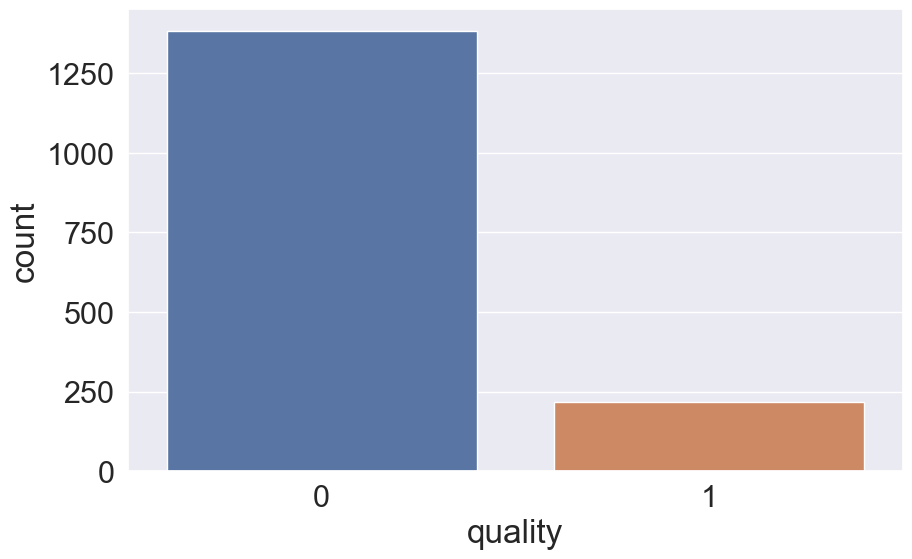

In [107]:
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10, 6))
sns.countplot(df['quality'])
sns.set(font_scale = 2)

In [108]:
#checking the null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [109]:
# no null values are present
# skewness observed in the total sulfur dioxide, free sulfur dioxide as there 50% quatile is greater than there mean values.


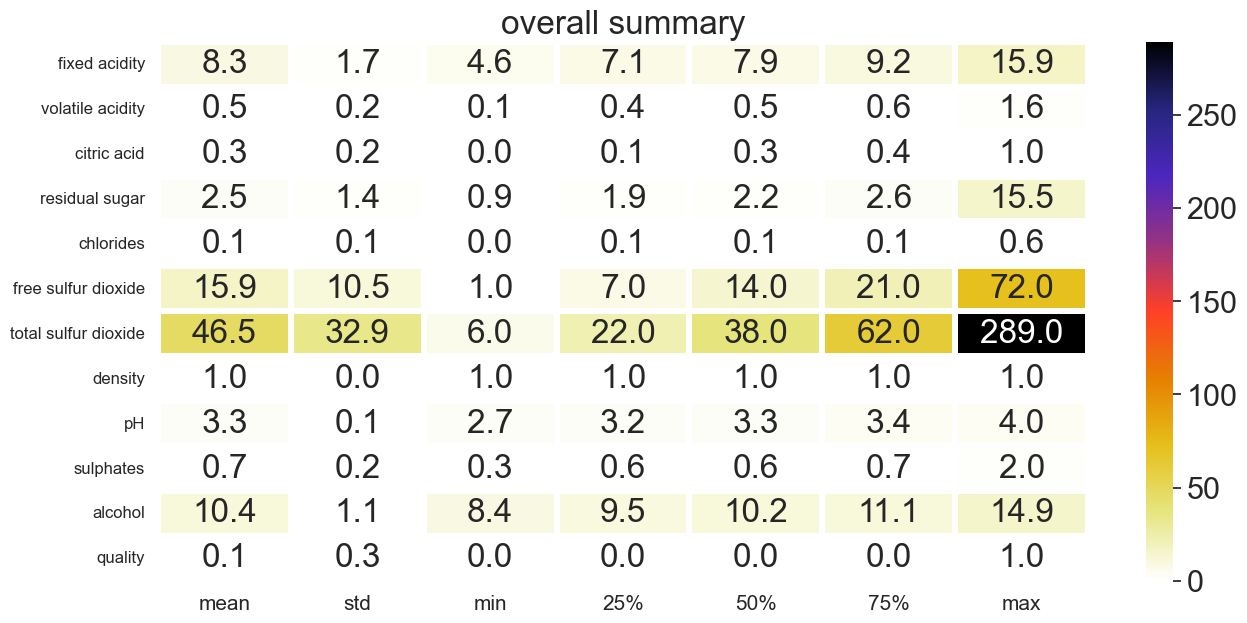

In [110]:
#using heatmap on the data for overal data analysis
plt.figure( figsize = (15, 7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=3,annot = True, fmt = '.1f',cmap='CMRmap_r')
plt.xticks(fontsize  = 15)
plt.yticks(fontsize = 12)
plt.title('overall summary')
plt.show()


In [111]:
#the data is not scaled, scaling will be required


In [112]:
#checking the corelation between the data

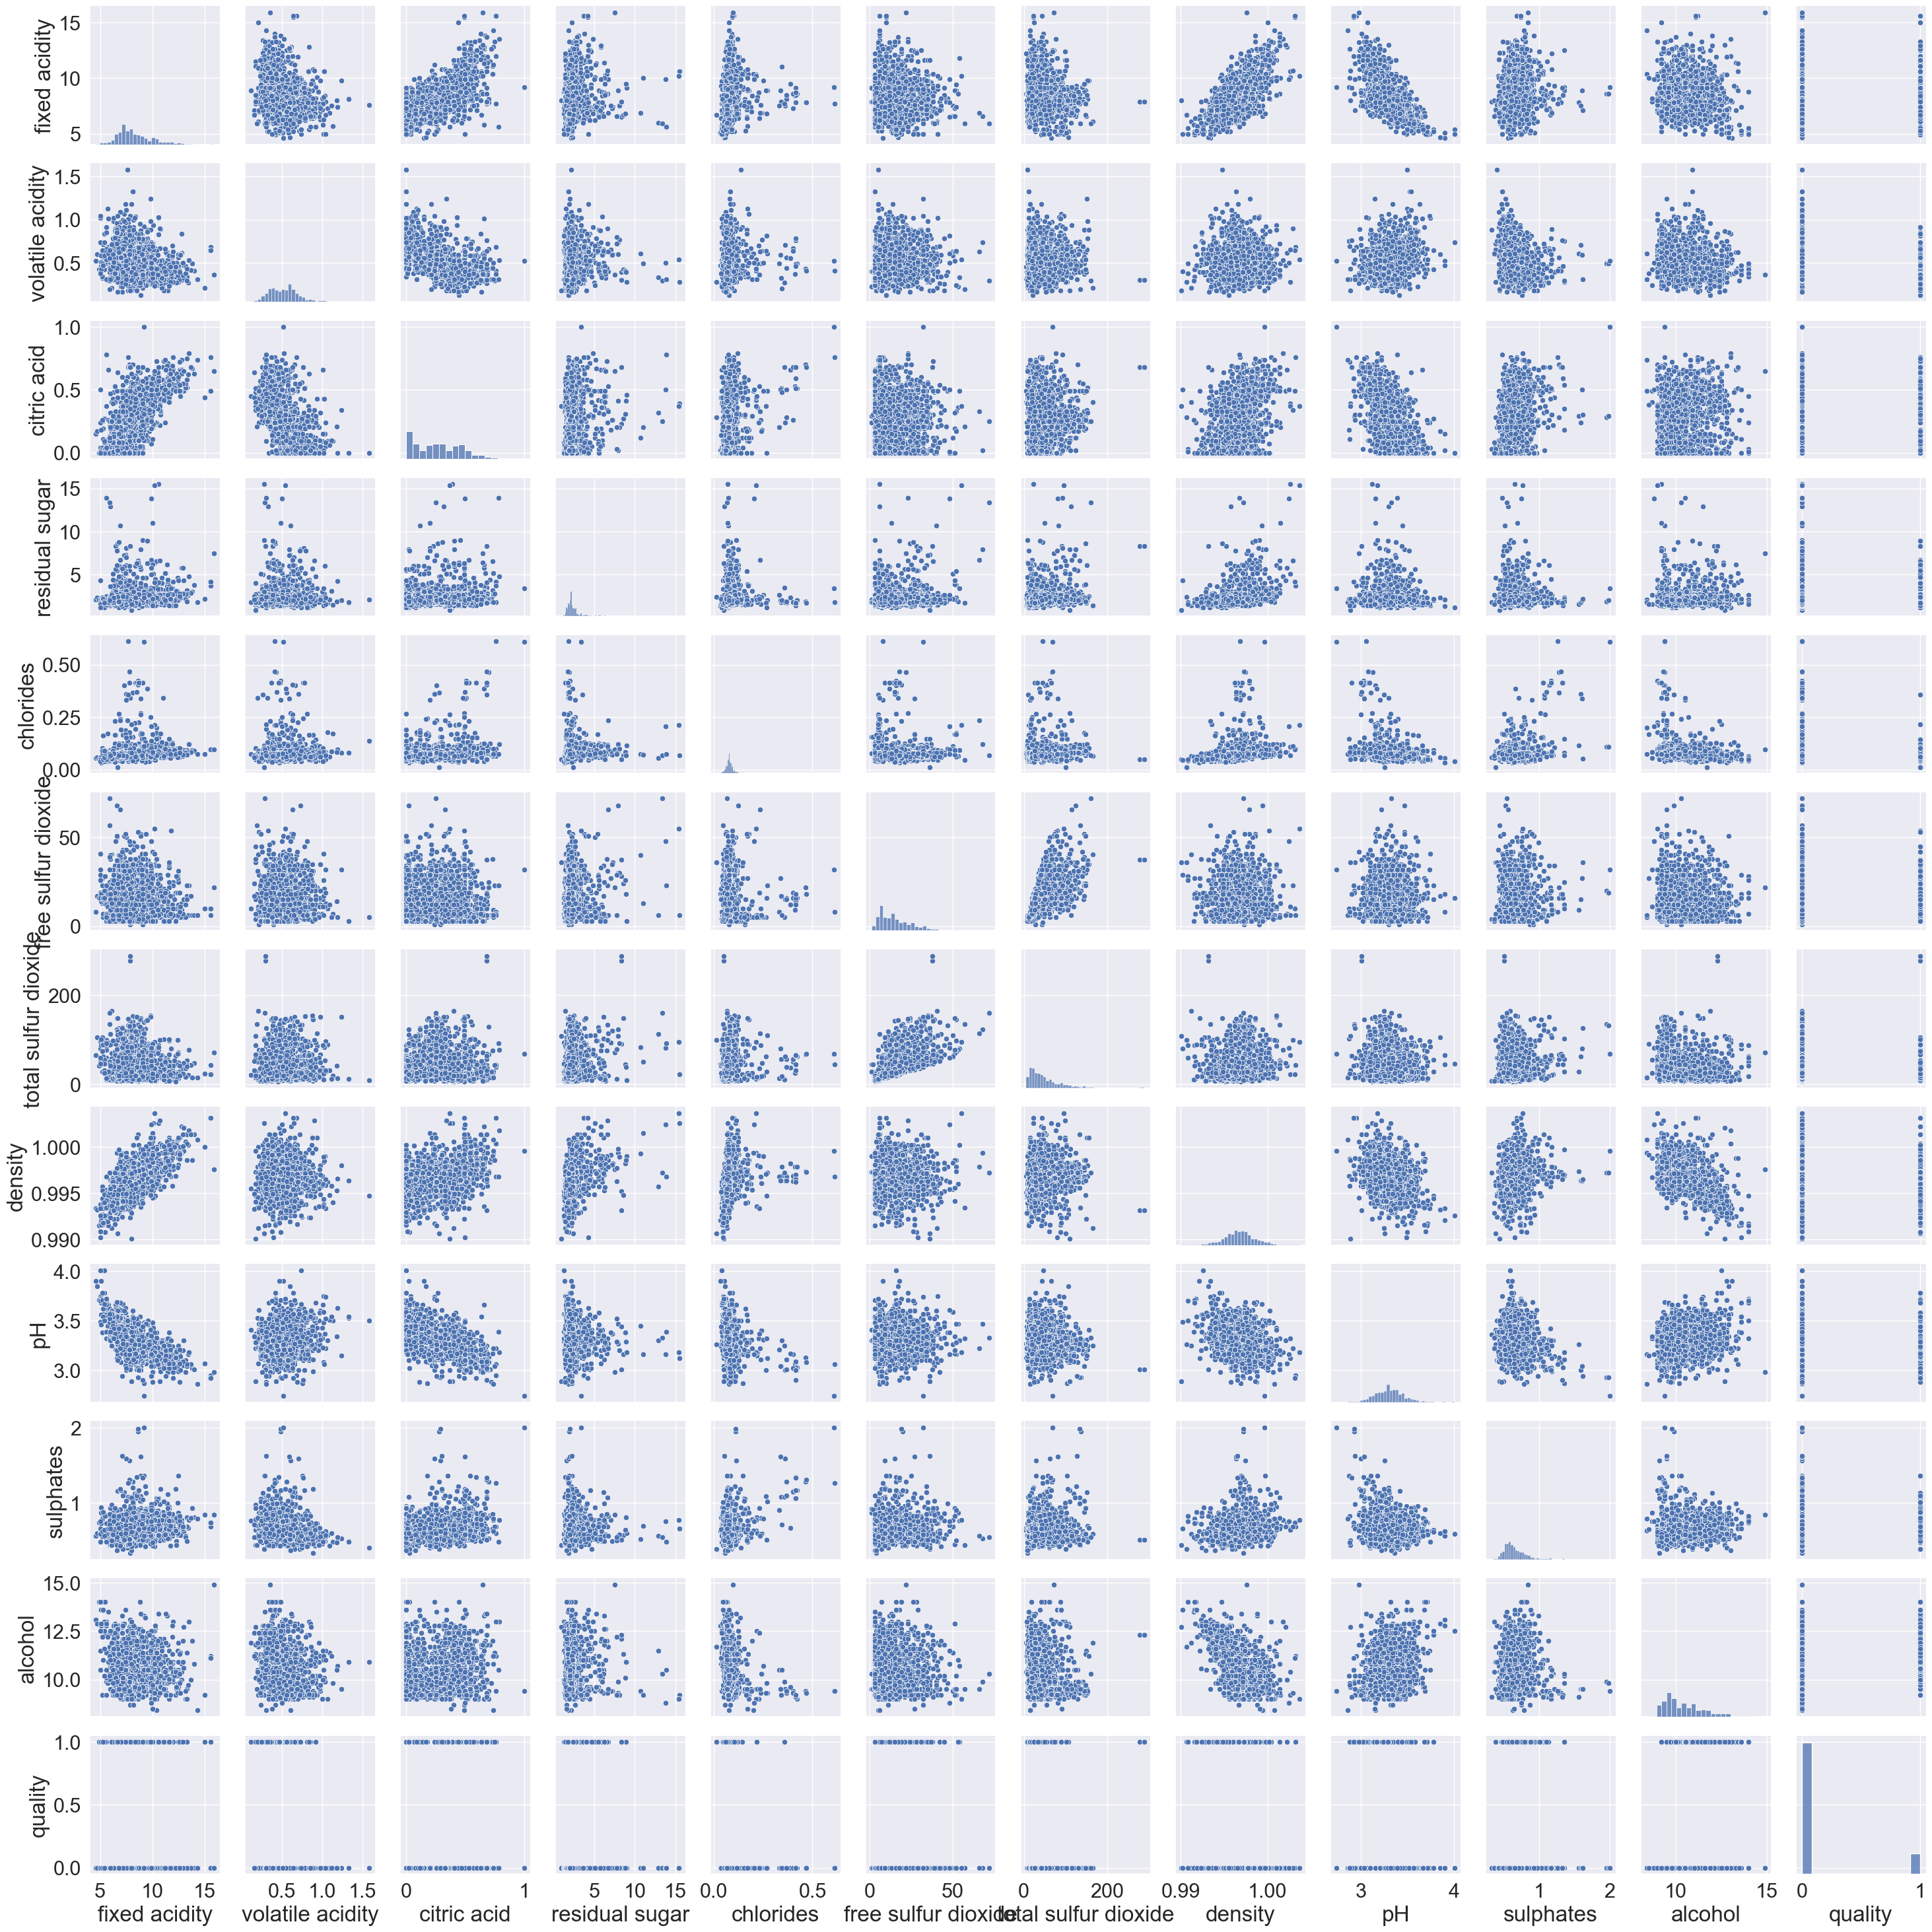

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot (df)
plt.savefig('pairplot.png')
plt.show()


### Ploting graphs for better understanding over data distribution




In [114]:
#let's plot bar plot 

In [115]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

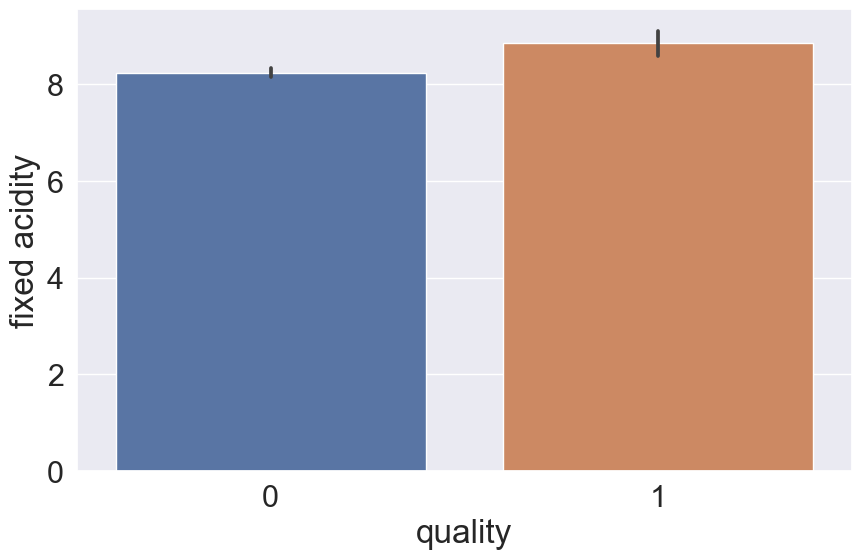

In [116]:
#fixed acidity vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'fixed acidity', data = df)
sns.set(font_scale=2)

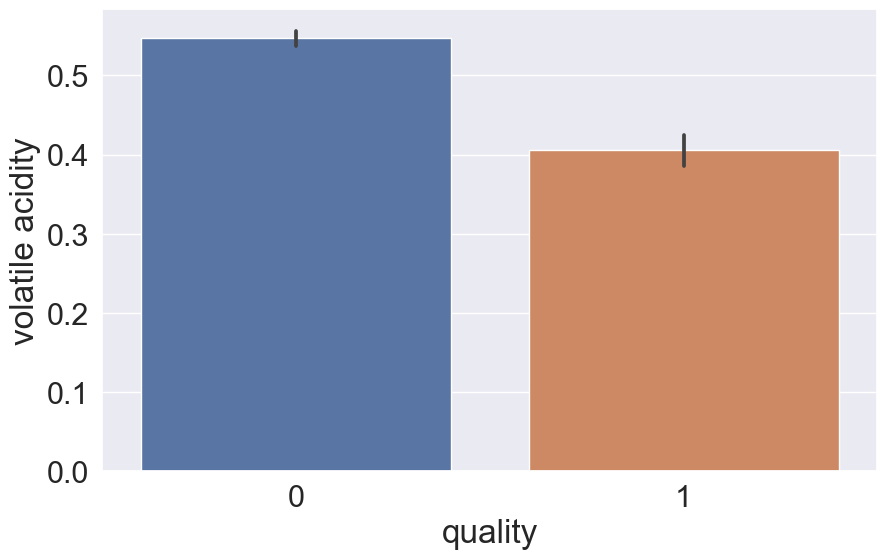

In [117]:
#volatile acidity vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'volatile acidity', data = df)
sns.set(font_scale=2)

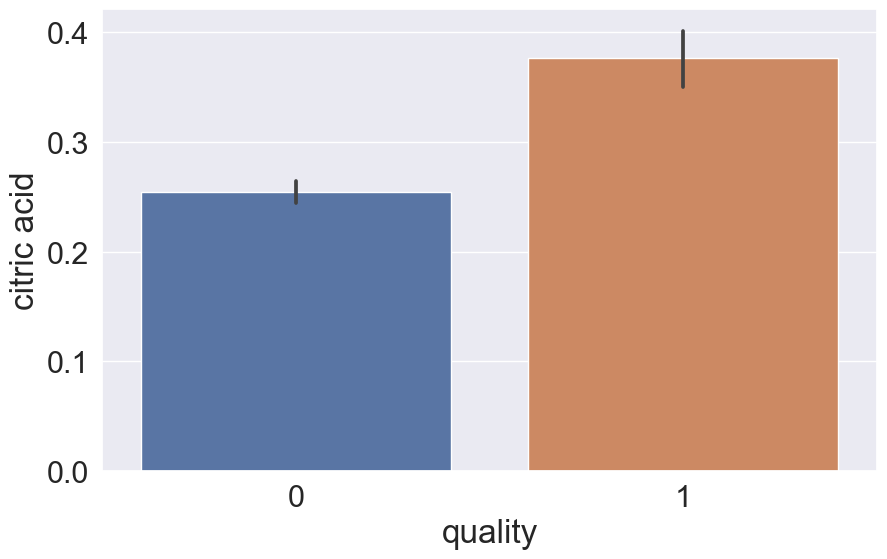

In [118]:
#citric acid vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'citric acid', data = df)
sns.set(font_scale=2)

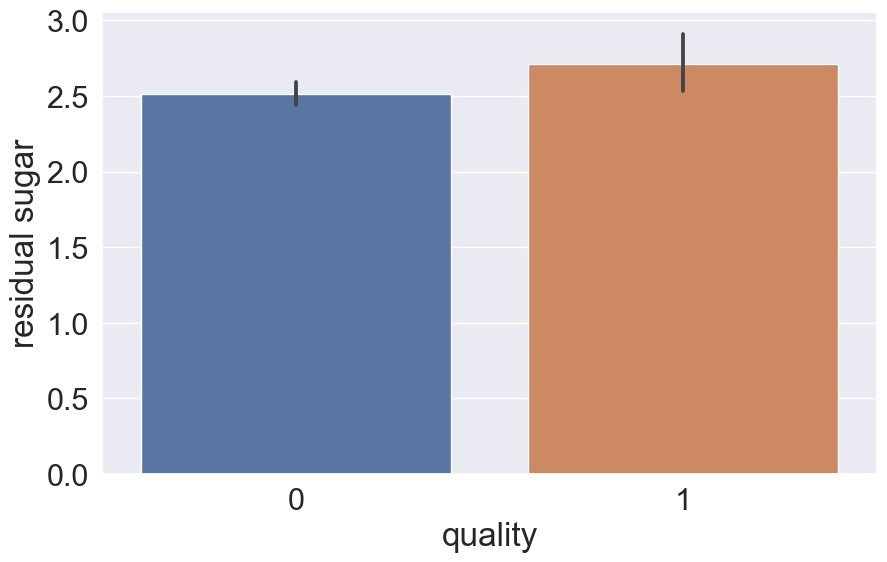

In [119]:
#residual sugar vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'residual sugar', data = df)
sns.set(font_scale=2)

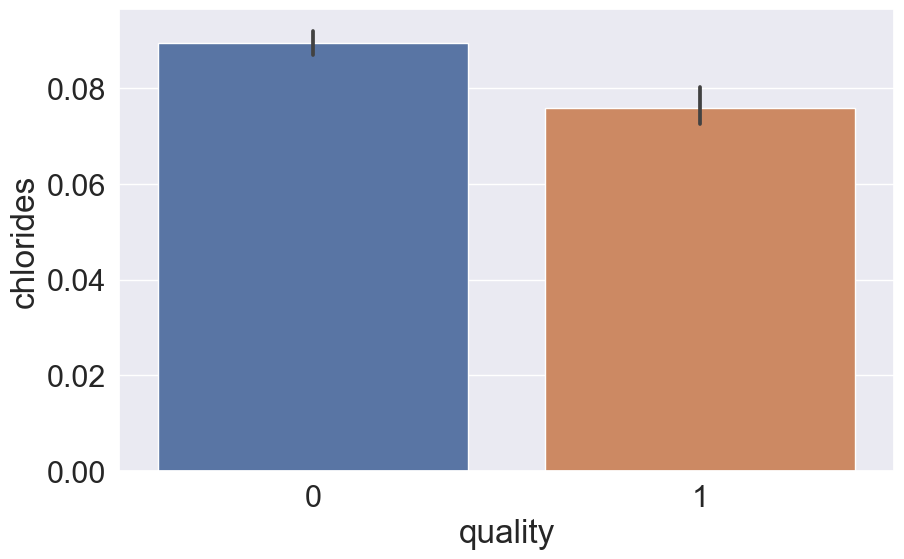

In [120]:
#chlorides vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'chlorides', data = df)
sns.set(font_scale=2)

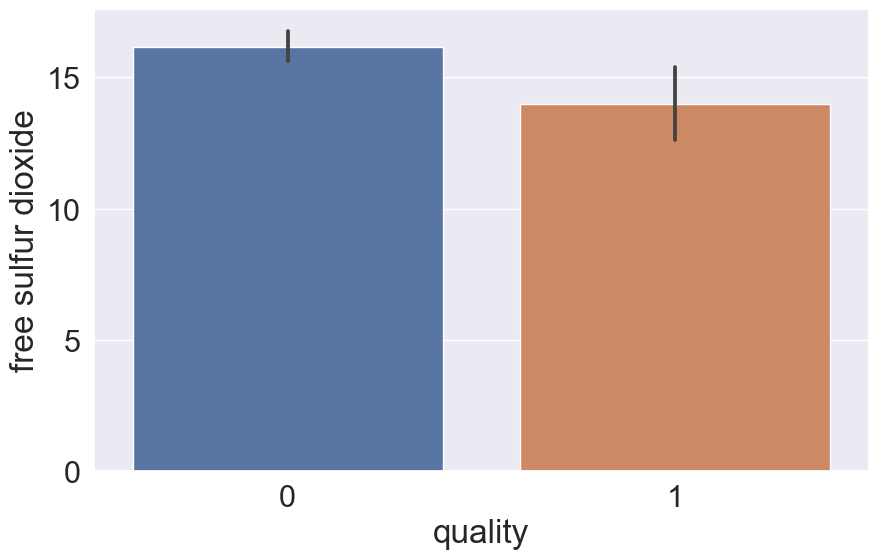

In [121]:
#free sulfur dioxide vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'free sulfur dioxide', data = df)
sns.set(font_scale=2)

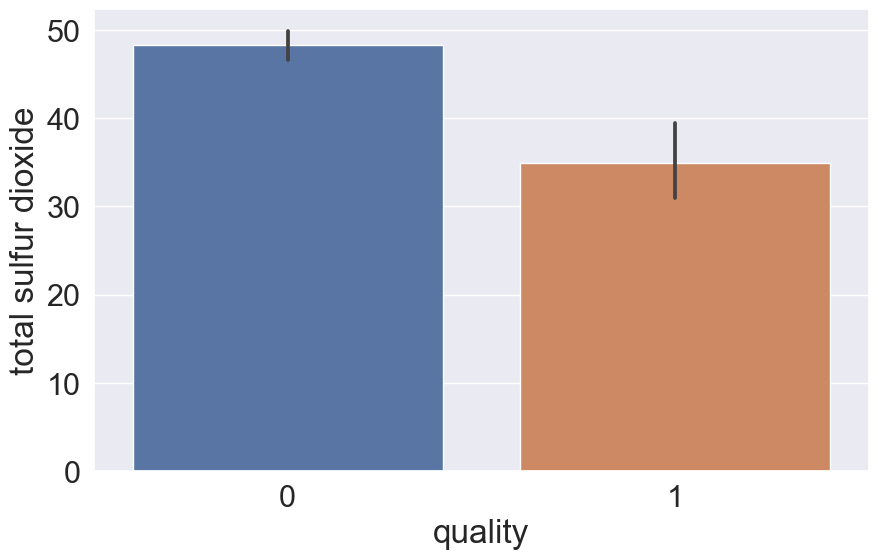

In [122]:
#total sulfur dioxidetotal sulfur dioxide vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'total sulfur dioxide', data = df)
sns.set(font_scale=2)

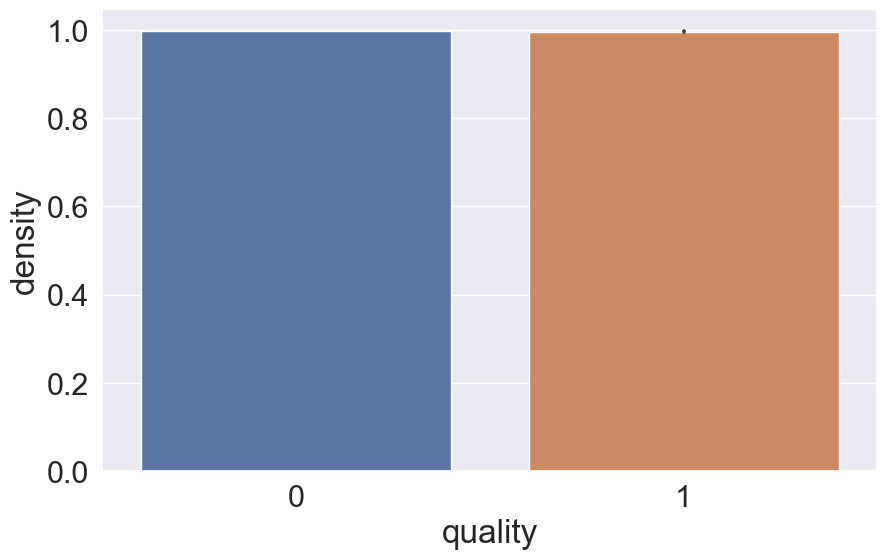

In [123]:
#densidensity vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'density', data = df)
sns.set(font_scale=2)

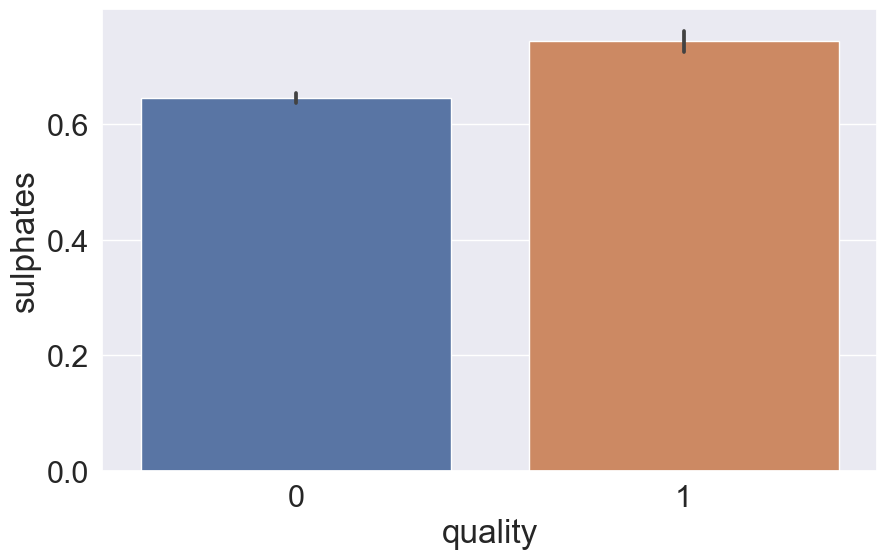

In [124]:
#free sulphates vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'sulphates', data = df)
sns.set(font_scale=2)

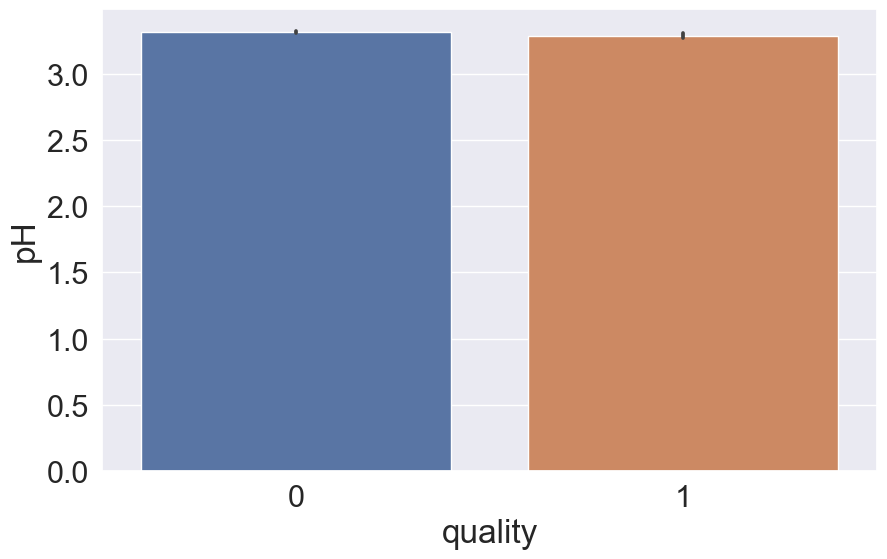

In [125]:
#pH vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'pH', data = df)
sns.set(font_scale=2)

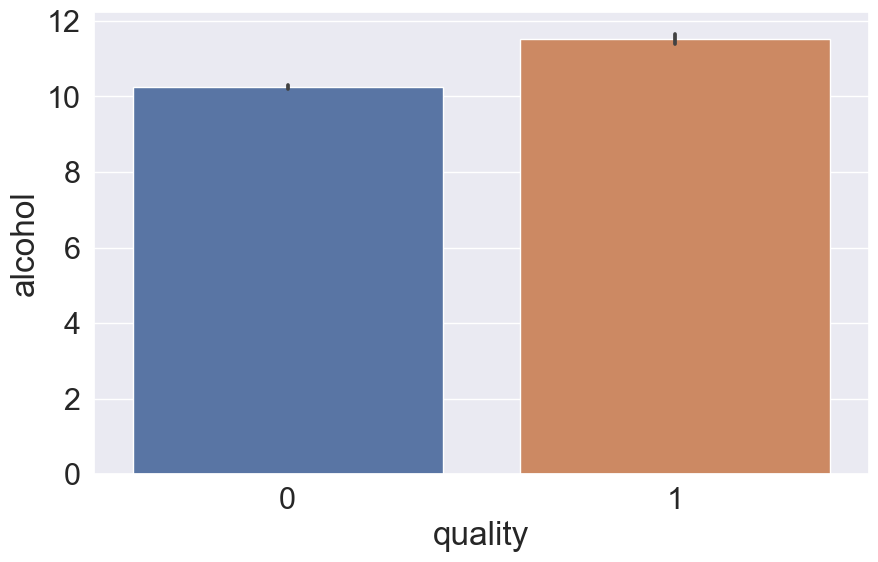

In [126]:
#alcohol vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'alcohol', data = df)
sns.set(font_scale=2)

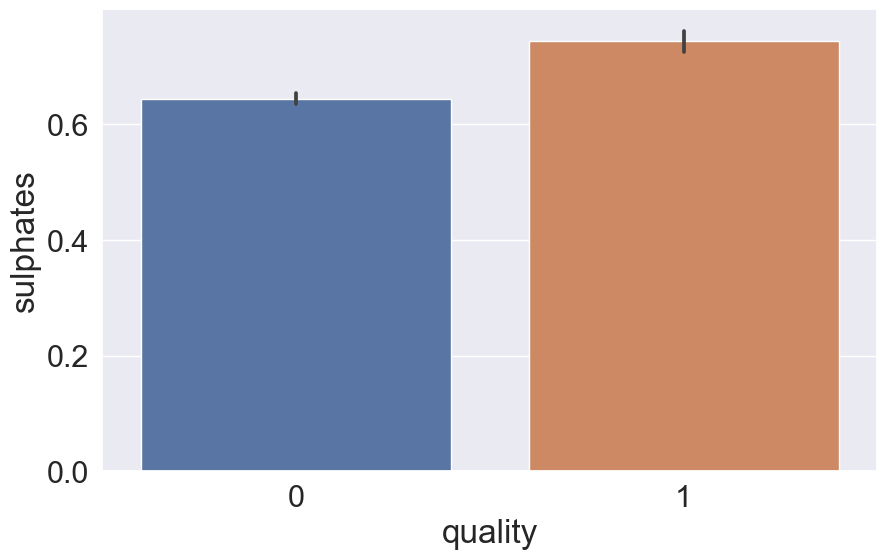

In [127]:
#free sulphates vs quality
plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y= 'sulphates', data = df)
sns.set(font_scale=2)

In [128]:
#we can easily identify now which parameters are effecting more to the dependent variable

In [129]:
#now separating dependent and independent variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [130]:
#splitting into train and test_sets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state= 33)


In [131]:
print("x-train shape:" ,x_train.shape)
print("x-test shape :" ,x_test.shape)
print("y-train shape:" ,y_train.shape)
print("y-test shape :" ,y_test.shape)

x-train shape: (1279, 11)
x-test shape : (320, 11)
y-train shape: (1279,)
y-test shape : (320,)


In [132]:
#some of the variables are large in numbers as compare to other i.e the sulphur dioxide, sulphate values are lies between 0 - 100 and others on 1-10 
#to mantain the imbalance , we will use StandardScaler

In [133]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Creating Ml Algorithms

## 1. RANDOM FOREST CLASSIFIER

In [134]:
# Checking accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict (x_test)
print (accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.925
[[275   3]
 [ 21  21]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       278
           1       0.88      0.50      0.64        42

    accuracy                           0.93       320
   macro avg       0.90      0.74      0.80       320
weighted avg       0.92      0.93      0.92       320



<Figure size 800x600 with 0 Axes>

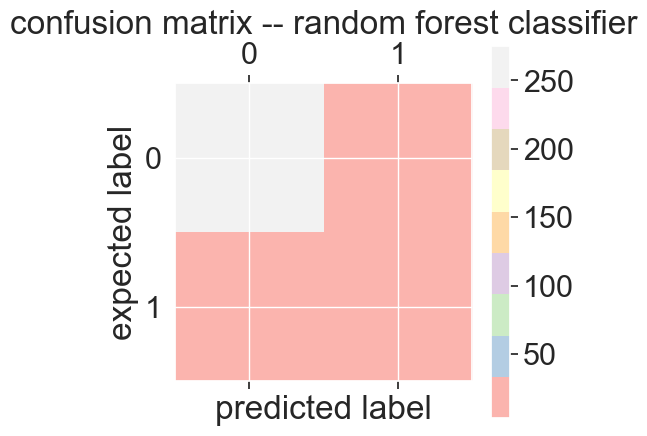

In [135]:
#confusion matrix using the random forest classifier
cm = confusion_matrix(y_test, predRFC)
#matplot for confusion matrix of rfc
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.matshow(cm, cmap = plt.cm.Pastel1, interpolation = 'nearest')
plt.title('confusion matrix -- random forest classifier')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [136]:
#here we can see the portion of good unit in the overall data

In [137]:
print('Total predictions : ', len(predRFC))
print('correct predictions : ', sum(predRFC == y_test))
print('Incorrect predictions: ', sum(predRFC != y_test))
print('Accuracy : ', sum(predRFC == y_test)*100/len(predRFC), "%")

Total predictions :  320
correct predictions :  296
Incorrect predictions:  24
Accuracy :  92.5 %


## 2. SVC


In [138]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test, predsvc))

0.9
[[272   6]
 [ 26  16]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       278
           1       0.73      0.38      0.50        42

    accuracy                           0.90       320
   macro avg       0.82      0.68      0.72       320
weighted avg       0.89      0.90      0.89       320



<Figure size 800x600 with 0 Axes>

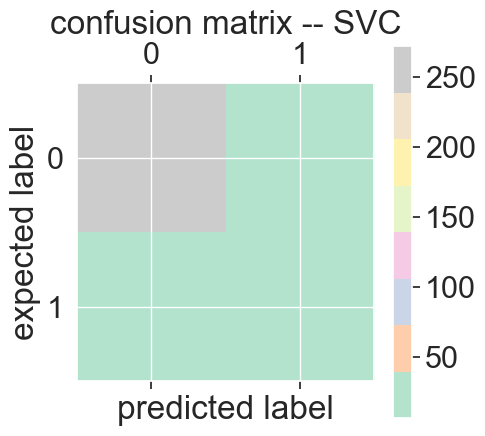

In [139]:
#confusion matrix using the SVC
cm = confusion_matrix(y_test, predsvc)
#matplot for confusion matrix of SVC
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.matshow(cm, cmap = plt.cm.Pastel2, interpolation = 'nearest')
plt.title('confusion matrix -- SVC')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [140]:
print('Total predictions : ', len(predsvc))
print('correct predictions : ', sum(predsvc == y_test))
print('Incorrect predictions: ', sum(predsvc != y_test))
print('Accuracy : ', sum(predsvc== y_test)*100/len(predsvc), "%")

Total predictions :  320
correct predictions :  288
Incorrect predictions:  32
Accuracy :  90.0 %


## 3. EXTRA TREES CLASSIFIER

In [141]:
# Checking accuracy for ExtraTrees Classifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print (accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report (y_test, predET))

0.934375
[[275   3]
 [ 18  24]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       278
           1       0.89      0.57      0.70        42

    accuracy                           0.93       320
   macro avg       0.91      0.78      0.83       320
weighted avg       0.93      0.93      0.93       320



<Figure size 800x600 with 0 Axes>

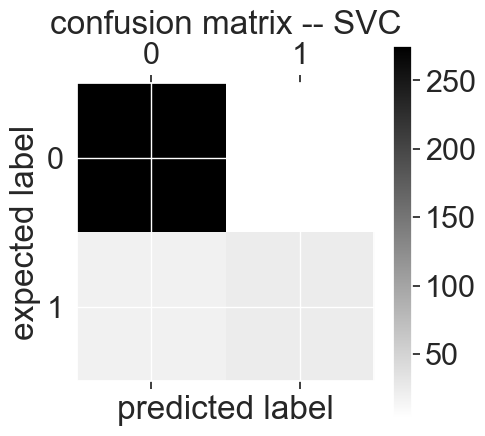

In [142]:
#confusion matrix using the ET
cm = confusion_matrix(y_test, predET)
#matplot for confusion matrix of ET
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title('confusion matrix -- SVC')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [143]:
print('Total predictions : ', len(predET))
print('correct predictions : ', sum(predET == y_test))
print('Incorrect predictions: ', sum(predET != y_test))
print('Accuracy : ', sum(predET== y_test)*100/len(predET), "%")

Total predictions :  320
correct predictions :  299
Incorrect predictions:  21
Accuracy :  93.4375 %


In [145]:
#applying KFold and cross validation to these algorithms 

In [146]:
#extra tree classifier

In [147]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [148]:
cross_val_score(RandomForestClassifier(n_estimators=40), x_train, y_train)

array([0.90625   , 0.91796875, 0.8828125 , 0.89453125, 0.90980392])

In [210]:
# now lets find the best parameters that will give us the best outcome
# using gridsearchcv
#considering svc for the hyperparameter tuning...

In [211]:
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV (svm.SVC (gamma= 'auto'), {
'C': [1,10,20],
'kernel': ['rbf', 'linear']
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train) 
clf.cv_results_

{'mean_fit_time': array([0.01212239, 0.01263404, 0.01573262, 0.02825594, 0.0157454 ,
        0.04411516]),
 'std_fit_time': array([0.00591665, 0.00391454, 0.00018025, 0.00631942, 0.00021506,
        0.00616064]),
 'mean_score_time': array([0.00520344, 0.        , 0.00312424, 0.00312519, 0.00625052,
        0.        ]),
 'std_score_time': array([0.00575872, 0.        , 0.00624847, 0.00625038, 0.0076553 ,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [212]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012122,0.005917,0.005203,0.005759,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.871094,0.886719,0.890625,0.898438,0.886275,0.886630,0.008909,2
1,0.012634,0.003915,0.000000,0.000000,1,linear,"{'C': 1, 'kernel': 'linear'}",0.863281,0.863281,0.863281,0.863281,0.862745,0.863174,0.000214,4
2,0.015733,0.000180,0.003124,0.006248,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.871094,0.882812,0.878906,0.894531,0.878431,0.881155,0.007686,3
3,0.028256,0.006319,0.003125,0.006250,10,linear,"{'C': 10, 'kernel': 'linear'}",0.863281,0.863281,0.863281,0.863281,0.862745,0.863174,0.000214,4
4,0.015745,0.000215,0.006251,0.007655,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.886719,0.890625,0.894531,0.894531,0.874510,0.888183,0.007425,1
5,0.044115,0.006161,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",0.863281,0.863281,0.863281,0.863281,0.862745,0.863174,0.000214,4


In [213]:
#choosing the best parameters 

In [214]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.886630
1,1,linear,0.863174
2,10,rbf,0.881155
3,10,linear,0.863174
4,20,rbf,0.888183
5,20,linear,0.863174


In [215]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [216]:
clf.best_score_

0.8881832107843138

In [217]:
clf.best_params_#these are the parameters we re gonna use in our model

{'C': 20, 'kernel': 'rbf'}

In [218]:
from sklearn.model_selection import RandomizedSearchCV
rs= RandomizedSearchCV (svm.SVC (gamma= 'auto'), {
'C': [1,10,20],
'kernel': ['rbf', 'linear']
}, cv=5, return_train_score=False, n_iter=2)
#possible combinations of parameter values are evaluated and the best combination is retained

In [219]:
rs.fit(x_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.863174
1,1,rbf,0.886630


In [220]:
Final_model = svm.SVC(C=10,
    kernel='rbf')
Final_model.fit(x_train, y_train)
pred= Final_model.predict(x_test) 
acc =accuracy_score (y_test, pred)
print(acc*100)

90.9375


In [209]:
#the svm model is increased by 1 % after going through hyperparameter tuning

In [224]:
#saving the model
import joblib
joblib.dump(Final_model, "red_wine_quality.pkl")

['red_wine_quality.pkl']

In [225]:
model = joblib.load("red_wine_quality.pkl")

#predict

prediction = model.predict(x_test)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [226]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original' ] = a 
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
315,0,0
316,0,0
317,0,0
318,0,0


#### In conclusion, the Support Vector Classifier (SVC) model has been successfully employed in evaluating the quality of red wine. Through the use of machine learning techniques, we were able to predict and classify the quality of red wines based on various input features.